# Data processing results.ods

In [40]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [49]:
results = pd.read_csv('results.csv')
gen_gap = (results['train_loss'] - results['val_loss']).to_list()
ece = results['ece'].to_list()
auroc = results['auroc'].to_list()
train_acc = results['train_acc'].to_list()
val_acc = results['val_acc'].to_list()
params = results['#params'].to_list()
inf_time = results['inf_time'].to_list()
train_time = results['train_time'].to_list()

Text(0, 0.5, 'ECE')

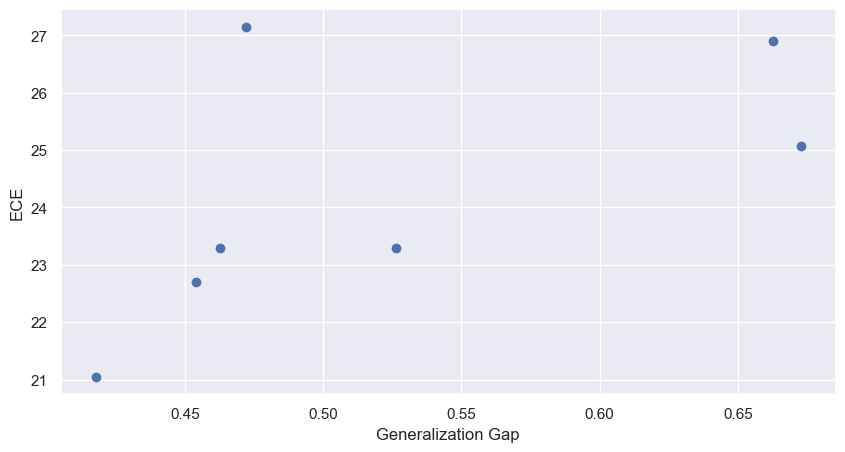

In [45]:
# Plot 1: Generalization Gap vs ECE
plt.figure(figsize=(10, 5))
plt.plot(gen_gap, ece, 'o')
plt.xlabel('Generalization Gap')
plt.ylabel('ECE')

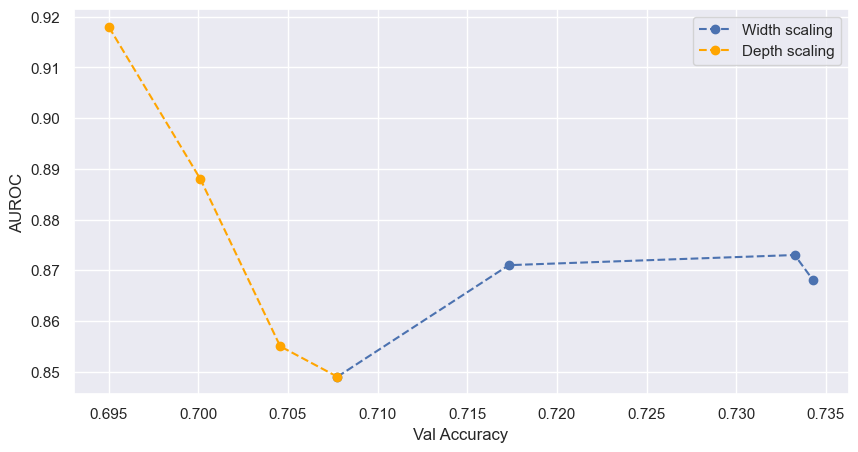

In [42]:
#Plot 2: Val accuracy vs AUROC
plt.figure(figsize=(10, 5))
plt.plot(val_acc[0:4], auroc[0:4], marker='o', linestyle = '--', color='b')
plt.plot([val_acc[0]]+val_acc[4:8], [auroc[0]]+auroc[4:8], marker='o', linestyle = '--', color='orange')
plt.xlabel('Val Accuracy')
plt.ylabel('AUROC')
plt.legend(['Width scaling', 'Depth scaling'])

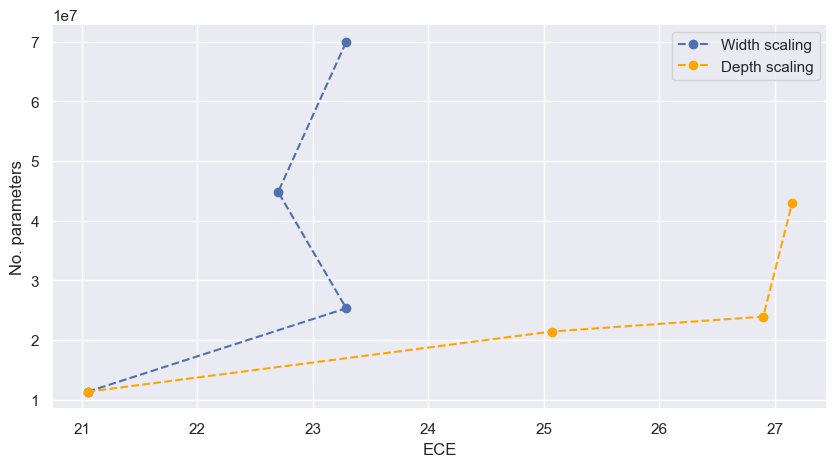

In [44]:
#Plot 3: generalisation gap vs #params
plt.figure(figsize=(10, 5))
plt.plot(ece[0:4], params[0:4], marker='o', linestyle = '--', color='b')
plt.plot([ece[0]]+ece[4:8], [params[0]]+params[4:8], marker='o', linestyle = '--', color='orange')
plt.xlabel('ECE')
plt.ylabel('No. parameters')
plt.legend(['Width scaling', 'Depth scaling'])


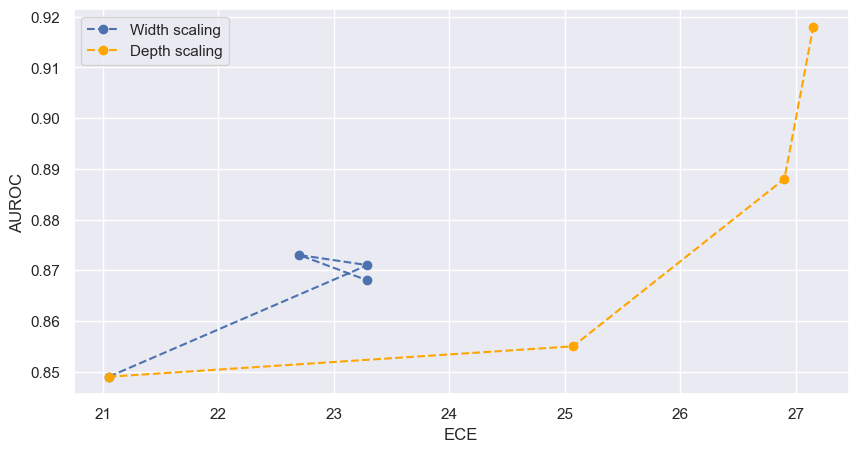

In [46]:
#Plot 4: ece vs auroc
plt.figure(figsize=(10, 5))
plt.plot(ece[0:4], auroc[0:4], marker='o', linestyle = '--', color='b')
plt.plot([ece[0]]+ece[4:8], [auroc[0]]+auroc[4:8], marker='o', linestyle = '--', color='orange')
plt.xlabel('ECE')
plt.ylabel('AUROC')
plt.legend(['Width scaling', 'Depth scaling'])


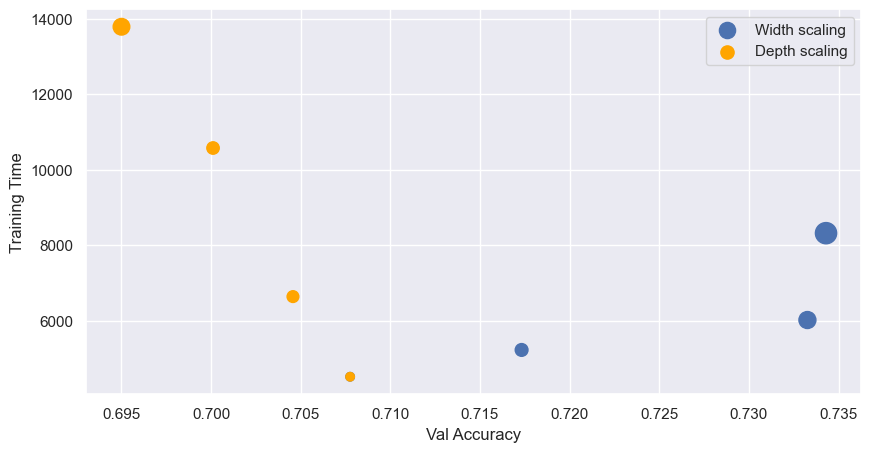

In [59]:
#Plot 5: validation accuracy vs training time
plt.figure(figsize=(10, 5))
plt.scatter(val_acc[0:4], train_time[0:4], marker='o', color='b', s=[p/0.3e6 for p in params[0:4]])
plt.scatter([val_acc[0]]+val_acc[4:8], [train_time[0]]+train_time[4:8], marker='o', color='orange', s=[p/0.3e6 for p in [params[0]]+params[4:8]])
plt.xlabel('Val Accuracy')
plt.ylabel('Training Time')
plt.legend(['Width scaling', 'Depth scaling'])

